# Waveguides - Ex6

### Ronen shekel

### ID 309987493 

## Q1 - Nmodes

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib ipympl

wl = 1.55e-6
d = 6e-6
n1 = 1.5
n2 = 1.47
n3 = 1.45
k0 = 2*np.pi/wl
kd_max = np.sqrt((n1**2-n2**2)*(k0*d)**2) - 1e-5

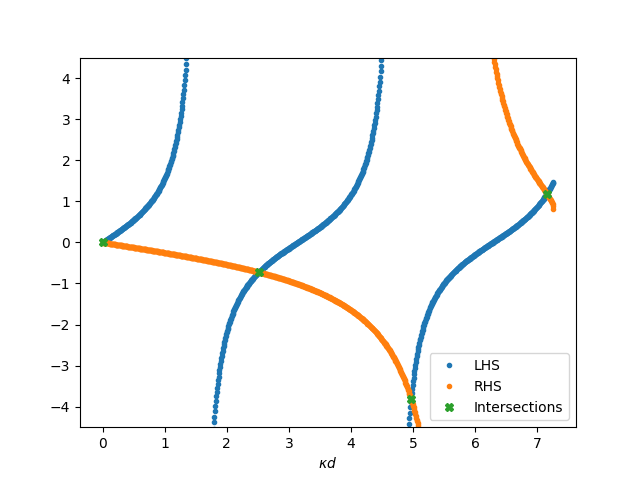

In [111]:
def RHS(kd):
    RHS_nom = kd*( np.sqrt( (n1**2-n2**2)*(k0*d)**2 - kd**2 ) + 
                   np.sqrt( (n1**2-n3**2)*(k0*d)**2 - kd**2 )
                   )
    RHS_denom = (kd**2 - 
                 np.sqrt((n1**2-n2**2)*(k0*d)**2 - kd**2) * 
                 np.sqrt((n1**2-n3**2)*(k0*d)**2 - kd**2)
                 )
    return RHS_nom/RHS_denom

diff_func = lambda x: np.tan(x) - RHS(x)

fig, ax = plt.subplots()
d = 6e-6
flag = False
if flag:
    d = 0.5e-6
    d = 3.2e-6
    kd_max = np.sqrt((n1**2-n2**2)*(k0*d)**2) - 1e-5
    ax.set_ylim(-15,15)
    
kd = np.linspace(0, kd_max, 1000)
ax.plot(kd, np.tan(kd), '.', label='LHS')
ax.plot(kd, RHS(kd), '.', label='RHS')
if not flag:
    sols = fsolve(diff_func, x0=(0, 2.5, 5, 7.2))
    ax.plot(sols, np.tan(sols), 'X', label='Intersections')
    ax.set_ylim([-4.5, 4.5])
ax.set_xlabel(r'$\kappa d$')
ax.legend()

We find four intersections, therefore we expect $4$ modes in the waveguide.

The solutions were for kd=[0, 2.396, 7.115], and by definition $\kappa^2=k_0^2n_1^2-\beta^2$, so inverting the relation and plugging in we get the $\beta$s, and $n_{eff}=\beta/k_0$, and also $\gamma^2=\beta^2-k_0^2n_2^2$: 

 

In [87]:
kappas = sols/d
betas = np.sqrt(k0**2*n1**2 - kappas**2)
n_effs = betas / k0
gammas = np.sqrt(betas**2 - k0**2*n2**2)
print(f'{list(kappas)=}')
print(f'{list(betas)=}')
print(f'{list(gammas)=}')
print(f'{list(n_effs)=}')

list(kappas)=[0.0, 419198.1447626157, 828097.5235805565, 1192224.1321203816]
list(betas)=[6080501.910173793, 6066034.651652983, 6023849.0992941465, 5962474.746145006]
list(gammas)=[1210004.6023851489, 1135070.0653355406, 882250.3211861089, 206670.64760881473]
list(n_effs)=[1.5, 1.4964310696548084, 1.4860243089181036, 1.470883859809836]


As expected for higher modes we get smaller $\beta$s and accordingly $n_{eff}$s, since larger $\kappa$ values means more transverse momenta, meaning there is less left for the longitudinal component which is $\beta$. 

# Q2 - single mode waveguide

If we want the WG from Q1 to be single mode, we will want a smaller value of $d$ such that we will have a single intersection. After playing numerically a bit and looking at the graph, it seems that for $d=0.6\mu m$ we still get a slight crossing, so we would like $d=0.5\mu m$, which is comparable to $\lambda/2$ which is the solution for a metal substrate etc. But this is actually the upper bound for no modes, since we don't count the zero solution. The largest $d$ such that we will have a single crossing is $d=3.1\mu m$. (Assuming a resolution of $0.1 \mu m$).

# Q3 - calculating the modes 

In [158]:
wl = 1.55e-6
k0 = 2*np.pi/wl
# source waveguide 
n1 = 1.452
n2 = 1.44
n3 = 1.44
d = 4e-6
kd_max1 = np.sqrt((n1**2-n2**2)*(k0*d)**2) - 1e-5

# transmission waveguide 
nn1 = 1.5
nn2 = 1.47
nn3 = 1.45 
dd = 6e-6

## A - draw single mode 

In [159]:
def RHS(kd):
    RHS_nom = kd*( np.sqrt( (n1**2-n2**2)*(k0*d)**2 - kd**2 ) + 
                   np.sqrt( (n1**2-n3**2)*(k0*d)**2 - kd**2 )
                   )
    RHS_denom = (kd**2 - 
                 np.sqrt((n1**2-n2**2)*(k0*d)**2 - kd**2) * 
                 np.sqrt((n1**2-n3**2)*(k0*d)**2 - kd**2)
                 )
    return RHS_nom/RHS_denom

diff_func = lambda x: np.tan(x) - RHS(x)
kd_sol = fsolve(diff_func, x0=(1.59,))[0] # 1.588 
kappa = kd_sol/d
beta = np.sqrt(k0**2*n1**2 - kappa**2)
n_eff = beta / k0
gamma = np.sqrt(beta**2 - k0**2*n2**2)
delta = np.sqrt(beta**2 - k0**2*n3**2)
print(f'{kappa=:.3f}, {beta=:.3f}, {n_eff=:.3f}, {gamma=:.3f}, {delta=:.3f}')

kappa=458859.408, beta=5868012.538, n_eff=1.448, gamma=599759.899, delta=599759.899


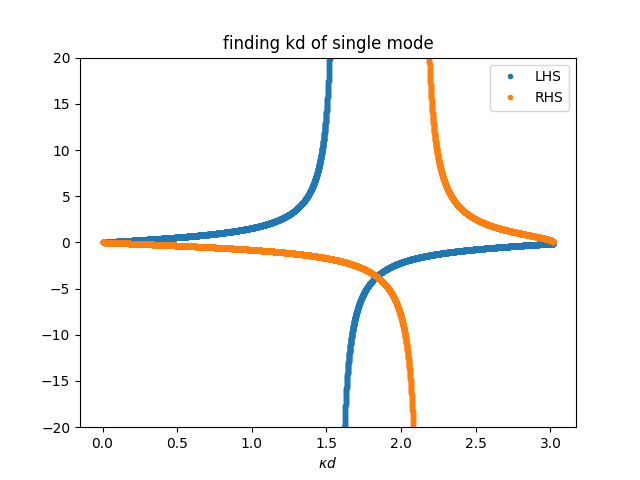

In [162]:
fig, ax = plt.subplots()

ax.set_title('finding kd of single mode')    
kd = np.linspace(0, kd_max1, 10000)
ax.plot(kd, np.tan(kd), '.', label='LHS')
ax.plot(kd, RHS(kd), '.', label='RHS')
ax.set_xlabel(r'$\kappa d$')
ax.set_ylim(-20, 20)
ax.legend()

normalization=1.0000


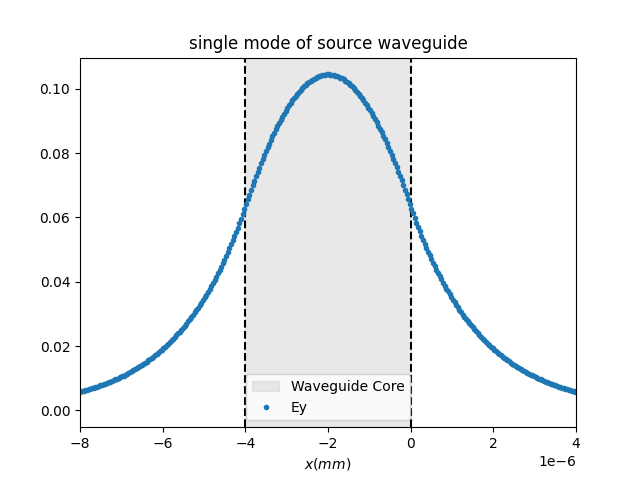

In [240]:
# Draw mode
def get_mode(xs, delta, kappa, gamma, d):
    Ey = np.zeros_like(xs)
    mask1 = xs > 0
    Ey[mask1] = np.exp(-delta * xs[mask1])
    
    mask2 = (-d < xs) & (xs <= 0)
    Ey[mask2] = np.cos(kappa * xs[mask2]) - (delta / kappa) * np.sin(kappa * xs[mask2])
    
    mask3 = xs <= -d
    Ey[mask3] = ((np.cos(kappa * d) + (delta / kappa) * np.sin(kappa * d)) *
                 np.exp(gamma * (xs[mask3] + d))
                 )
    
    return Ey / np.sqrt((np.abs(Ey)**2).sum())
    
def plot_mode(xs, Ey, d, title, ax=None):
    if not ax:
        fig, ax = plt.subplots()
    ax.set_title(title)
    ax.axvline(-d, linestyle='--', color='k')
    ax.axvline(0, linestyle='--', color='k')
    ax.axvspan(-d, 0, color='lightgray', alpha=0.5, label="Waveguide Core")
    ax.plot(xs, Ey, '.', label='Ey')
    ax.set_xlabel(r'$x (mm)$')
    ax.set_xlim(-2*d, d)
    ax.legend()

# important to have the same xs for both waveguides, otherwise when calculating the overlap we will have bugs 
xs = np.linspace(-20e-6, 20e-6, 1000)
Ey_SM = get_mode(xs, delta, kappa, gamma, d)
plot_mode(xs, Ey_SM, d, title='single mode of source waveguide')
normalization = (np.abs(Ey_SM) ** 2).sum()
print(f'{normalization=:.4f}')

## B - several modes 

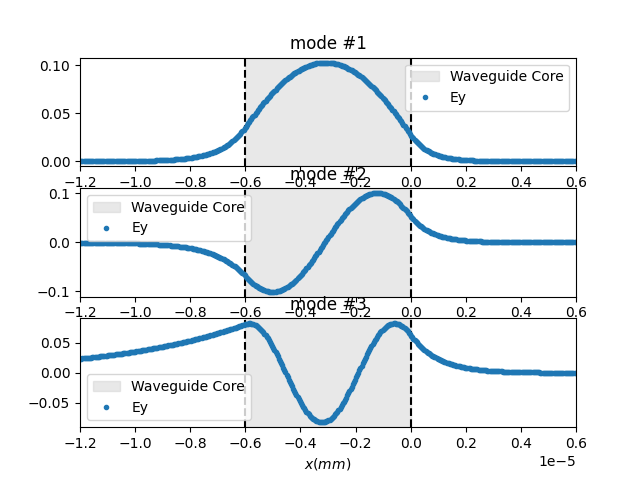

In [241]:
def RHS(kd):
    RHS_nom = kd*( np.sqrt( (nn1**2-nn2**2)*(k0*dd)**2 - kd**2 ) + 
                   np.sqrt( (nn1**2-nn3**2)*(k0*dd)**2 - kd**2 )
                   )
    RHS_denom = (kd**2 - 
                 np.sqrt((nn1**2-nn2**2)*(k0*dd)**2 - kd**2) * 
                 np.sqrt((nn1**2-nn3**2)*(k0*dd)**2 - kd**2)
                 )
    return RHS_nom/RHS_denom

diff_func = lambda x: np.tan(x) - RHS(x)
kd_sols = fsolve(diff_func, x0=(0, 2.5, 5, 7.2)) 
kappas = kd_sols/dd
betas = np.sqrt(k0**2*nn1**2 - kappas**2)
n_effs = betas / k0
gammas = np.sqrt(betas**2 - k0**2*nn2**2)
deltas = np.sqrt(betas**2 - k0**2*nn3**2)
# print(f'{list(kappas)=}\n {list(betas)=}\n {list(n_effs)=}\n {list(gammas)=}\n {list(deltas)=}')

Eys = []
fig, axes = plt.subplots(len(kappas) - 1, 1)
for i in range(1, len(kappas)):
    xs = np.linspace(-20e-6, 20e-6, 1000)
    Ey = get_mode(xs, deltas[i], kappas[i], gammas[i], dd)
    Eys.append(Ey)
    plot_mode(xs, Ey, dd, f'mode #{i}', ax=axes[i-1])
Eys = np.array(Eys)

# C - overlaps
We normalized well, so the denominator is just 1, and $\eta$:

In [242]:
etas = []
for i, Ey in enumerate(Eys):
    eta = (Ey_SM*Ey.conj()).sum()
    etas.append(eta)
    print(f'overlap {i}= {eta}')
etas = np.array(etas)

overlap 0= 0.9214548035045441
overlap 1= 0.3280887937409473
overlap 2= 0.11449502813914153


Which is sort of expected, since the second mode is mostly anti-symmetric. The power in each mode, and total power will be: 

In [244]:
powers = np.abs(etas)**2
for i, power in enumerate(powers):
    print(f'power {i} = {power}')
    
tot_power = powers.sum()
print(f'total power {tot_power}')

power 0 = 0.849078954901598
power 1 = 0.10764225657838986
power 2 = 0.013109111468582811
total power 0.9698303229485707


This could also be calculated from $\eta*\phi_i$ and get the same result:

In [245]:
transmited_field = (etas[:, np.newaxis] * Eys).sum(axis=0)
tot_power2 = (np.abs(transmited_field)**2).sum()
print(f'total power 2: {tot_power2}')

total power 2: 0.9698302928097547


This makes sense, and is great, but we wanted a $3\mu m$ shift between the waveguides, So we need to move the x axis and then repeat the above, so basically move the Ey_SM values:

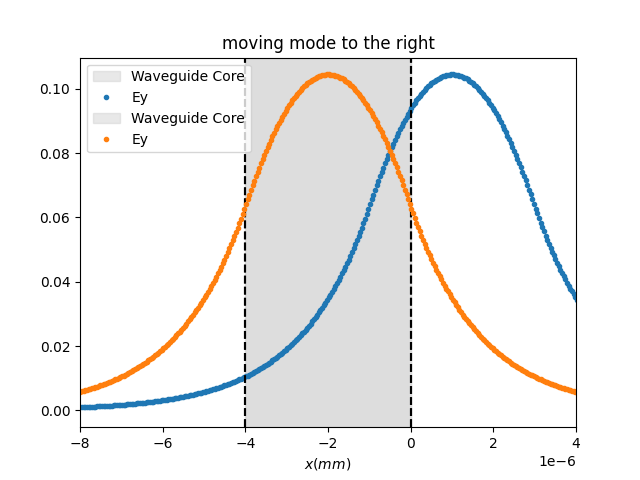

In [257]:
N_pixels = round(3e-6 / (xs[1]-xs[0]))
new_Ey_SM = np.zeros_like(Ey_SM)
# I want to move towards n3, which is at x>0, higher x values, so moving right 
# And the edges are zero anyway, since I took a wide enough range 
new_Ey_SM[N_pixels:] = Ey_SM[:-N_pixels]
fig, ax = plt.subplots()
plot_mode(xs, new_Ey_SM, d, f'moving mode to the right', ax)
plot_mode(xs, Ey_SM, d, f'moving mode to the right', ax)

In [258]:
etas = []
for i, Ey in enumerate(Eys):
    eta = (new_Ey_SM*Ey.conj()).sum()
    etas.append(eta)
    print(f'overlap {i}= {eta}')
etas = np.array(etas)

powers = np.abs(etas)**2
for i, power in enumerate(powers):
    print(f'power {i} = {power}')
    
tot_power = powers.sum()
print(f'total power {tot_power}')

transmited_field = (etas[:, np.newaxis] * Eys).sum(axis=0)
tot_power2 = (np.abs(transmited_field)**2).sum()
print(f'total power 2: {tot_power2}')

overlap 0= 0.3570620920640748
overlap 1= 0.36607859502895146
overlap 2= 0.307872223984045
power 0 = 0.12749333758917383
power 1 = 0.13401353773837105
power 2 = 0.09478530630088199
total power 0.3562921816284269
total power 2: 0.35629215685809323


And we see now much less overlap, and spread more symmetrically for the different modes, since there is no symmetric-anti-symmetric element, and in total only 35% of the power is transmitted. Next time do a better splice!  